## Observations and Insights

The purpose of this study was to compare the performance of Pymaceuticals' drug Capomulin, versus other treatment regimens.  In the study 250 mice identified with SCC tumor growth were treated through a variety of drug regimens over a course of 45 days, tumor development was observed and measured. This analysis is of the four most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. 

A breakdown of the data points for each treatment regimen shows that: Capomulin had the highest tumor volume of 230 with a Median of 41.56; Ramicane had 228 with a Median of 40.68; Infubinol had 178 with a Median of 51.82 and Ceftamin had 178 with a Median of 51.78. The data therefore is of statistical significance since the number of data points for each Drug Regimen is above 100 (statistical significance is obtained with a sample size =>30

Based on the average final tumor volume, both Capomulin and Ramicane both were more effective in reducing tumor volume in the mice over the 45-day study period than Infubinol and Ceftamin.  Capomulin was more consistent in its effects than Ramicane as shown by the shortness of its box and only infubinol registered an outlier.

The line Plot -Timepoint Versus Tumor Volume- shows a downward trend of tumor shrinkage in the mice treated by Capomulin treatment regimen suggesting treatment over a longer period of time may lead to more shrinkage other variables remaining constant.

There was a strong correlation between the weight of the mouse (R-squared of 0.84) and their average tumor volume. Suggesting that to have positive results the weight of the mouse must be controlled otherwise correlating only the final tumor volume to efficacy without controlling for mouse weight could skew the interpretation of the drug’s efficacy.


## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from pandas.plotting import table

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

In [2]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)
mouse_metadata


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata,study_results, how="left", on=["Mouse ID", "Mouse ID"])

#combined_data_df = combined_data_df.rename(columns={'Drug Regimen':'Drug'}) 
#combined_data_df

In [4]:
#show how many different drug regimens are in the data set
#set(combined_data_df['Drug Regimen']) 


# Summary Statistics Table

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation,and SEM 
# of the tumor volume for each regimen

#stats_summary_df = combined_data_df{['Drug Regimen', 'Tumor Volume (mm3)']}
 
#average = df['Price'].mean()
average = combined_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
average

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [6]:
#calculate the median
med = combined_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
#med

In [7]:
#calculate the variance
Var = combined_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
#Var

In [8]:
#calculate standard deviation
standard_deviation = combined_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
#standard_deviation

In [9]:
# calculate SEM
#sr.sem() 
StdErrorMean = combined_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem() 
#StdErrorMean 

In [10]:
drug_regimen =combined_data_df['Drug Regimen'].unique()
#drug_regimen

In [11]:
tumor_volume = combined_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].count()
#tumor_volume

In [12]:
#Create summary statistics table of mean, median, variance, standard deviation,and SEM
stats_summary_df = pd.DataFrame({
    "Tumor Volume (mm3)":tumor_volume,
    "Mean":average, 
    "Median":med,
    "Variance":Var, 
    "Standard Deviation":standard_deviation,
    "SEM":StdErrorMean})  

stats_summary_df.sort_values(["Tumor Volume (mm3)"], ascending = False)

,Tumor Volume (mm3),Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Zoniferol,182,53.236507,51.818479,48.533355,6.966589,0.516398
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236


## Bar plots

In [13]:
#combined_data_df

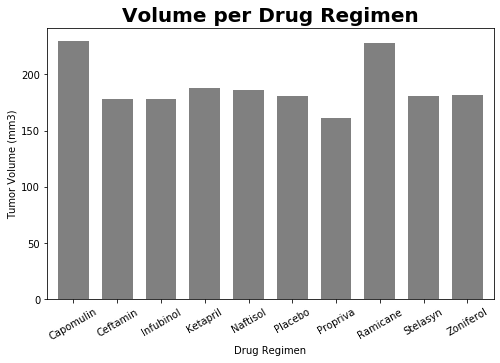

In [14]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
# Filter the DataFrame to those columns tobe used in the chart
datapoints = stats_summary_df[["Tumor Volume (mm3)"]]

# Use DataFrame.plot() in order to create a bar chart of the data
datapoints.plot(kind="bar",color='grey',width=0.7,legend=False, figsize=(8,5))
plt.xticks(rotation=30)

# Set a title for the chart
plt.title("Volume per Drug Regimen",fontdict={'fontweight':'bold', 'fontsize':20})
plt.ylabel("Tumor Volume (mm3)")

#save figure as PandaBarChart
plt.savefig("Figures/PandaBarChart.png")
plt.show()
#plt.tight_layout()

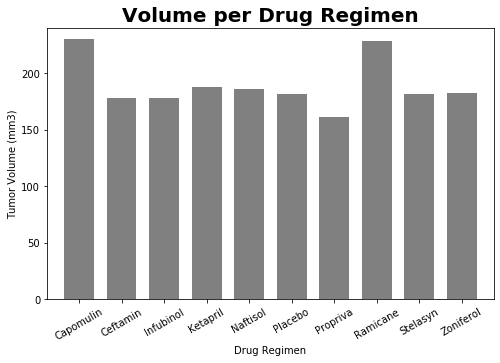

In [15]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Set x axis and tick locations
x_axis = np.arange(len(datapoints))
tick_locations = [value for value in x_axis]

# Create a list to show the x labels position and set figure size to adjust for space
plt.figure(figsize=(8,5))
plt.bar(x_axis, datapoints["Tumor Volume (mm3)"], color='grey',width=0.7)
plt.xticks(tick_locations, datapoints.index.values, rotation=(30))

# Set x and y limits
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(datapoints["Tumor Volume (mm3)"])+10)

# Set a Title and labels
plt.title("Volume per Drug Regimen", fontdict={'fontweight':'bold', 'fontsize':20})
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")

# Save the figure as PyplotBarChart
plt.savefig("Figures/PyplotBarChart.png")
plt.show()


## Pie plots

In [16]:
#combined_data_df

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(combined_data_df.groupby(["Sex"]).count()).reset_index()
#gender_df.head()

In [18]:
# Filter the DataFrame for columns to be used in the pie chart
gender_df = gender_df[["Sex","Mouse ID"]]
#ender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df.head()

,Sex,Mouse ID
0,Female,935
1,Male,958


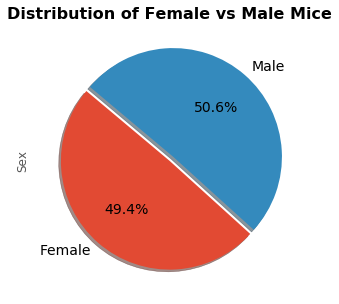

In [19]:
plt.style.use('ggplot')
aspect=('equal')
gender_df = pd.DataFrame({'Sex': [935,958]}, index=['Female', 'Male'])
explode=(0,.05)
plot = gender_df.plot.pie(y='Sex',explode=explode, figsize=(6, 5),autopct='%1.1f%%',
                          shadow=True,startangle=140, legend = False,fontsize=14,subplots=True)

plt.title('Distribution of Female vs Male Mice',fontdict={'fontweight':'bold', 'fontsize':16})

#save figure as PandaPieChart
plt.savefig("Figures/PandaPieChart.png")
plt.show()

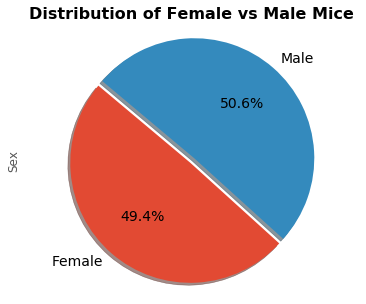

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.style.use('ggplot')
fig1, ax1 = plt.subplots(figsize=(6, 5))
plt.rcParams['font.size'] = 14
explode=(0,.05)
plt.pie(gender_df["Sex"], explode=explode, labels=gender_df.index.values,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.ylabel("Sex")

# Set a title for the chart
plt.title('Distribution of Female vs Male Mice',fontdict={'fontweight':'bold', 'fontsize':16})

# Save as PyplotPieChart
plt.savefig("Figures/PyplotPieChart.png")
plt.show()

## Quartiles, outliers and boxplots

In [21]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# First create a subset of the combined_data dataframe where 'Drug Regimen' is
# in [Capomulin, Ramicane, Infubinol, and Ceftamin]

# Create a list of the four most promising treatment regimens to examine
four_treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# get a subset of combined_data_df for the four treatments
four_treatment_df = combined_data_df[combined_data_df['Drug Regimen'].isin(four_treatment_list)]

# Sort data by Drug Regimen, Mouse ID and Timepoint
four_treatment_df=four_treatment_df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending = True)
# View the newly created subset dataframe
four_treatment_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0


In [22]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Select final tumor volume of each mouse 
four_treatment_df = four_treatment_df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
# Select final volume of each mouse 
max_df = four_treatment_df.loc[four_treatment_df["Timepoint"] == 45]
max_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [23]:
# Select data for Capomulin regimen and reset index
capo_data_df = max_df[max_df['Drug Regimen'].isin(['Capomulin'])]
capo_data_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [24]:
# Convert "Tumor Volume"  column for Capomulin into a list and sort
capo_list = capo_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
capo_list = capo_list["Tumor Volume (mm3)"]
#capo_list

In [25]:
# quartile calculations for Capomulin
quartiles = capo_list.quantile([.25,.5,.75]).round(2)
lowerq = quartiles[0.25].round(2)
upperq = quartiles[0.75].round(2)
iqr = round(upperq-lowerq,2)

print(f"The lower quartile for Capomulin is: {lowerq}")
print(f"The upper quartile for Capomulin is: {upperq}")
print(f"The interquartile range for Capomulin is: {iqr}")
print(f"The the median for Capomulin is: {quartiles[0.5]} ")

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile for Capomulin is: 32.38
The upper quartile for Capomulin is: 40.16
The interquartile range for Capomulin is: 7.78
The the median for Capomulin is: 37.31 
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.


In [26]:
# Select data for Ramicane regimen and reset index
rami_data_df = max_df[max_df['Drug Regimen'].isin(['Ramicane'])]
rami_data_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,327,a411,Ramicane,Male,3,22,45,38.407618,1
1,430,a444,Ramicane,Female,10,25,45,43.047543,0
2,214,a520,Ramicane,Male,13,21,45,38.810366,1
3,174,a644,Ramicane,Female,7,17,45,32.978522,1
4,154,c758,Ramicane,Male,9,17,45,33.397653,1


In [27]:
# Convert "Tumor Volume"  column for Ramicane into a list and sort
rami_list = rami_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
rami_list = rami_list["Tumor Volume (mm3)"]
#rami_list

In [28]:
# quartile calculations for Ramicane
quartiles = rami_list.quantile([.25,.5,.75]).round(2)
lowerq = quartiles[0.25].round(2)
upperq = quartiles[0.75].round(2)
iqr = round(upperq-lowerq,2)

print(f"The lower quartile for Ramicane is: {lowerq}")
print(f"The upper quartile for Ramicane is: {upperq}")
print(f"The interquartile range for Ramicane is: {iqr}")
print(f"The the median for Ramicane is: {quartiles[0.5]} ")

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile for Ramicane is: 30.98
The upper quartile for Ramicane is: 38.51
The interquartile range for Ramicane is: 7.53
The the median for Ramicane is: 34.85 
Values below 19.69 could be outliers.
Values above 49.8 could be outliers.


In [29]:
# Select data for Infubinol regimen and reset index
infu_data_df = max_df[max_df['Drug Regimen'].isin(['Infubinol'])]
infu_data_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,463,a203,Infubinol,Female,20,23,45,67.973419,2
1,473,a251,Infubinol,Female,21,25,45,65.525743,1
2,540,a685,Infubinol,Male,8,30,45,66.083066,3
3,637,c139,Infubinol,Male,11,28,45,72.226731,2
4,800,e476,Infubinol,Male,23,26,45,62.435404,1


In [30]:
# Convert "Tumor Volume"  column for Infubinol into a list and sort
infu_list = infu_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
infu_list = infu_list["Tumor Volume (mm3)"]
#infu_list

In [31]:
# quartile calculations for Infubinol
quartiles = infu_list.quantile([.25,.5,.75]).round(2)
lowerq = quartiles[0.25].round(2)
upperq = quartiles[0.75].round(2)
iqr = round(upperq-lowerq,2)

print(f"The lower quartile for Infubinol is: {lowerq}")
print(f"The upper quartile for Infubinol is: {upperq}")
print(f"The interquartile range for Infubinol is: {iqr}")
print(f"The the median for Infubinol is: {quartiles[0.5]} ")

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile for Infubinol is: 62.75
The upper quartile for Infubinol is: 67.69
The interquartile range for Infubinol is: 4.94
The the median for Infubinol is: 66.08 
Values below 55.34 could be outliers.
Values above 75.1 could be outliers.


In [32]:
# Select data for Ceftamin regimen and reset index
ceft_data_df = max_df[max_df['Drug Regimen'].isin(['Ceftamin'])]
ceft_data_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,493,a275,Ceftamin,Female,20,28,45,62.999356,3
1,993,j296,Ceftamin,Female,24,30,45,61.849023,3
2,1033,k210,Ceftamin,Male,15,28,45,68.923185,3
3,1112,l471,Ceftamin,Female,7,28,45,67.748662,1
4,1132,l661,Ceftamin,Male,18,26,45,59.851956,3


In [33]:
# Convert "Tumor Volume"  column for Ceftamin into a list and sort
ceft_list = ceft_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ceft_list = ceft_list["Tumor Volume (mm3)"]
#ceft_list

In [34]:
# quartile calculations for Ceftamin
quartiles = ceft_list.quantile([.25,.5,.75]).round(2)
lowerq = quartiles[0.25].round(2)
upperq = quartiles[0.75].round(2)
iqr = round(upperq-lowerq,2)

print(f"The lower quartile for Ceftamin is: {lowerq}")
print(f"The upper quartile for Ceftamin is: {upperq}")
print(f"The interquartile range for Ceftamin is: {iqr}")
print(f"The the median for Ceftamin is: {quartiles[0.5]} ")

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile for Ceftamin is: 61.43
The upper quartile for Ceftamin is: 67.53
The interquartile range for Ceftamin is: 6.1
The the median for Ceftamin is: 64.3 
Values below 52.28 could be outliers.
Values above 76.68 could be outliers.


## Box and whisker plots
Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.

Hint: All four box plots should be within the same figure. Use this Matplotlib documentation page for help with changing the style of the outliers.

In [35]:
max_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
309,b128,Capomulin,Female,9,22,45,38.982878,2
299,b742,Capomulin,Male,7,21,45,38.939633,0
244,g288,Capomulin,Male,3,19,45,37.074024,1
360,g316,Capomulin,Female,22,22,45,40.159220,2
440,i557,Capomulin,Female,1,24,45,47.685963,1


In [36]:
# Create a list of the four drugs to examine
four_drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# create a variable to hold drug values
four_drugs = combined_data_df[combined_data_df['Drug Regimen'].isin(four_drug_list)]

# groupby Drug Regimen and Mouse ID, using the.agg method. Round output to 2 decimals
four_final_tumor = four_drugs.groupby(['Drug Regimen','Mouse ID']).agg(\

# Get the last value of the 'Tumor Volume (mm3)' column using a lambda function, the element in -1 position
final_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(2)

four_final_tumor_unstack = four_final_tumor.stack(level=0).unstack(level=0)
# View the result to confirm transpose
four_final_tumor_unstack.head()


,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,final_tumor_size,NaN,NaN,67.97,NaN
a251,final_tumor_size,NaN,NaN,65.53,NaN
a275,final_tumor_size,NaN,63.0,NaN,NaN
a411,final_tumor_size,NaN,NaN,NaN,38.41
a444,final_tumor_size,NaN,NaN,NaN,43.05


In [37]:
# Create an empty list
boxplot_list = []

# Iterate through the list of the four drugs names using them to select the same column names
# and appending to the boxplot_list
for drug in four_drug_list:
    boxplot_list.append(list(four_final_tumor_unstack[drug].dropna()))

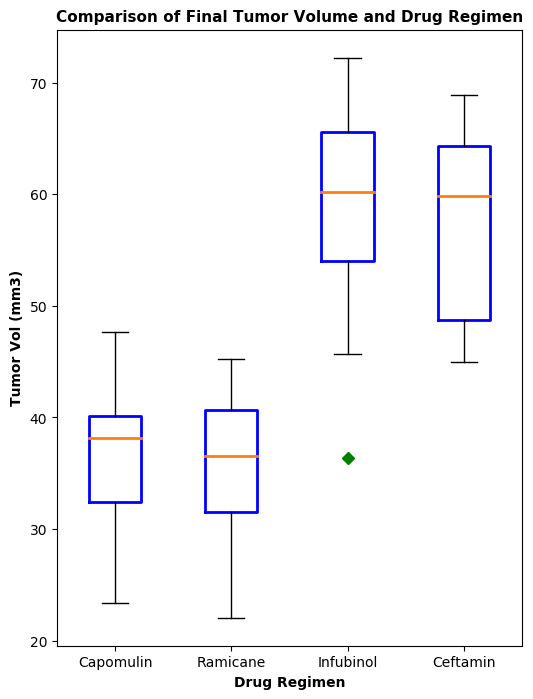

In [38]:
# Plot the list of lists using a boxplot utilizing the same y-axis for all plots
plt.style.use('default')

fig1, ax = plt.subplots(figsize=(6,8))
ax.set_title('Comparison of Final Tumor Volume and Drug Regimen',fontdict={'fontweight':'bold','fontsize':11})
ax.set_xlabel('Drug Regimen',fontdict={'fontweight':'bold'})
ax.set_ylabel('Tumor Vol (mm3)',fontdict={'fontweight':'bold'})
boxes=ax.boxplot(boxplot_list,notch=0,sym='gD',medianprops={'linewidth':2})
plt.xticks([1,2,3,4],four_drug_list)


for box in boxes['boxes']:
    box.set(color='b', linewidth=2)

# Save figure as BoxWhiskerPlot
plt.savefig("Figures/BoxWhiskerPlot.png")

plt.show()

## Line and scatter plots

In [39]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Create a dataframe for only the Capomulin data
capomulin_data = combined_data_df.loc[combined_data_df['Drug Regimen'] == 'Capomulin']

# View the dataframe
capomulin_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [40]:
# Groupby timepoint and then get the mean of the tumor volume
capo_timepoint = capomulin_data.groupby(['Timepoint']).agg(\
                                                           
# Get the mean of the 'Tumor Volume (mm3)' column\
Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),\
                                                           
# Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem)\
).round(2)

# View the groupby dataframe 
capo_timepoint.head(10)

,Tumor_Vol_Mean,Tumor_Vol_SEM
Timepoint,,
0,45.00,0.00
5,44.27,0.45
10,43.08,0.70
15,42.06,0.84
20,40.72,0.91
25,39.94,0.88
30,38.77,0.93
35,37.82,1.05
40,36.96,1.22


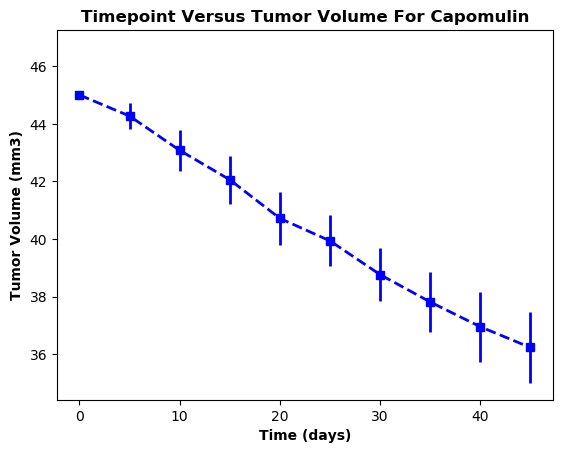

In [41]:
# Generate the a line Plot (with Error Bars)

# get the values for the x axis
time_series = list(capo_timepoint.index.values)

# Use errorbar plot from matplotlib
plt.errorbar(
    time_series,  # X values
    capo_timepoint['Tumor_Vol_Mean'], # Y values
    yerr=capo_timepoint['Tumor_Vol_SEM'], # Y-errors
    label="Timepoint Versus Tumor Volume For Capomulin",
    fmt="bs--", # format line using dashed lines for plot()
    linewidth=2  # width of plot line
    )
# Add the descriptive title, x labels and y labels
plt.title("Timepoint Versus Tumor Volume For Capomulin", fontdict={'fontweight':'bold'})
plt.xlabel("Time (days)",fontdict={'fontweight':'bold'})
plt.ylabel("Tumor Volume (mm3)",fontdict={'fontweight':'bold'})

# Set x and y limits 
plt.xlim(min(time_series)-max(time_series)*0.05, max(time_series)*1.05)
plt.ylim(min(capo_timepoint['Tumor_Vol_Mean'])*0.95, max(capo_timepoint['Tumor_Vol_Mean'])*1.05)
plt.rcParams["figure.figsize"] = [8,5]

# Save figure as LineChart
plt.savefig("Figures/LineChart.png")

plt.show()

In [42]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Groupby Mouse ID using .agg() method and get the weight and mean of tumor volume

capo_mouseid = capomulin_data.groupby(['Mouse ID']).agg(\
        # Get the mean of the 'Tumor Volume (mm3)' column\
        Mouse_weight=('Weight (g)', np.mean),\
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
        Tumor_vol_mean=('Tumor Volume (mm3)', np.mean)\
).round(2)
capo_mouseid .head(10)

,Mouse_weight,Tumor_vol_mean
Mouse ID,,
b128,22,41.96
b742,21,40.08
f966,17,36.51
g288,19,41.99
g316,22,44.61
i557,24,44.81
i738,20,39.14
j119,23,44.47
j246,21,43.22


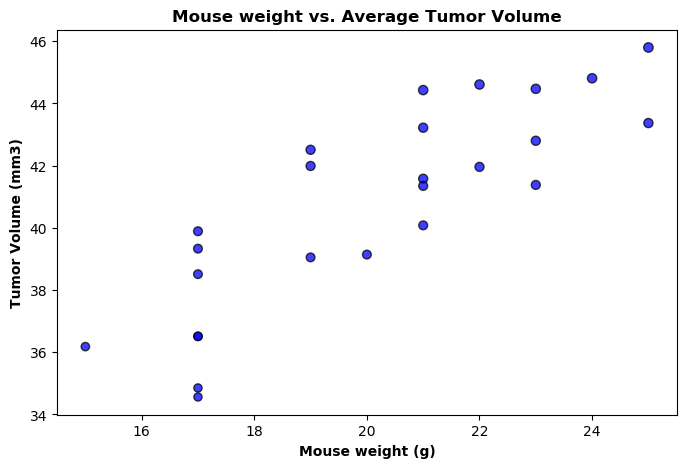

In [43]:
#create scatter plot from the above dataframe
plt.scatter(
    capo_mouseid['Mouse_weight'],
    capo_mouseid['Tumor_vol_mean'],
    marker='o',
    facecolors='blue',
    edgecolors='black',
    s=capo_mouseid['Tumor_vol_mean'],
    alpha=.75)

# Create a title, x label, and y label for our chart
plt.title("Mouse weight vs. Average Tumor Volume",fontdict={'fontweight':'bold'})
plt.xlabel("Mouse weight (g)",fontdict={'fontweight':'bold'})
plt.ylabel("Tumor Volume (mm3)",fontdict={'fontweight':'bold'})

# Save figure as ScatterPlot(1)
plt.savefig("Figures/ScatterPlot(1).png")

plt.show()

In [44]:
# Calculate the correlation coefficient and linear regression model for 
#mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capo_mouseid['Mouse_weight'],capo_mouseid['Tumor_vol_mean'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


The r-squared is: 0.8418558779004007
The equation of the regression line is: y = 0.95x + 21.56


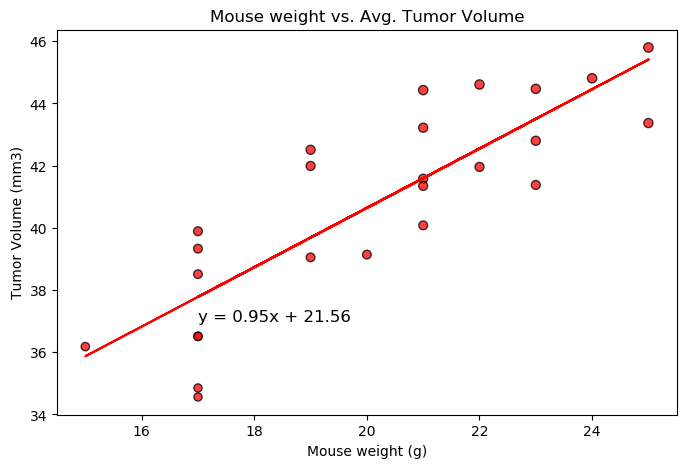

In [45]:
# Print out the r-squared value along with the plot.
from scipy.stats import linregress

x_values = capo_mouseid['Mouse_weight']
y_values = capo_mouseid['Tumor_vol_mean']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'

#plt.scatter(x_values,y_values)
plt.scatter(
    capo_mouseid['Mouse_weight'],
    capo_mouseid['Tumor_vol_mean'],
    marker='o',
    facecolors='red',
    edgecolors='black',
    s=capo_mouseid['Tumor_vol_mean'],
    alpha=.75)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=12,color="black")

plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")

print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")

# Save figure as ScatterPlotRegress
plt.savefig("Figures/ScatterPlotRegress.png")

plt.show()